# $k$-Means Clustering

In this notebook, we introduce the concept of $k$-Means Clustering method, then apply it on the CVDs data set.

---

## Introduction

[$k$-Means clustering](https://en.wikipedia.org/wiki/K-means_clustering) algorithm is defined as an unsupervised learning method having an iterative process in which the dataset are grouped into k number of predefined non-overlapping clusters or subgroups, making the inner points of the cluster as similar as possible while trying to keep the clusters at distinct space it allocates the data points to a cluster so that the sum of the squared distance between the clusters centroid and the data point is at a minimum, at this position the centroid of the cluster is the arithmetic mean of the data points that are in the clusters.

---

## Algorithm

$k$-Means clustering algorithm uses an iterative technique to group unlabeled data into $k$ clusters based on cluster centers (centroids). The data in each cluster are chosen such that their average distance to their respective centroid is minimized. 

First, we randomly place $k$ centroids $m_1^{(1)}, \dots, m_k^{(1)}$ for the initial cluster. Then the algorithm proceeds by alternating between following two steps:

* **Assignment Step:** Assign each observation to the cluster with the nearest mean: that with the least squared Euclidean distance.
$$
S_i^{(t)} = \left\{ x_p: \|x_p - m_i^{(t)}\|^2 \le \|x_p - m_j^{(t)}\|^2, \forall j,\, j = 1,\dots,k \right\},
$$
where each $x_p$ is assigned to exactly one $S^{(t)}$, even if it could be assigned to two or more of them.

* **Update Step:** Recalculate means (centroids) for observations assigned to each cluster.
$$
m_i^{(t+1)} = \frac1{\left|S_i^{(t)}\right|} \sum_{x_j \in S_i^{(t)}} x_j.
$$

The algorithm has converged when the assignments no longer change.

---

## Coding

In [2]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Set theme for plotting
sns.set_theme()

We load the data set and preprocess the response varaible. 

In [3]:
# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")

# Data Preprocessing by onehot encoding
df.Sex = df.Sex.replace({'M':1, 'F':0})
df.ExerciseAngina = df.ExerciseAngina.replace({'Y':1, 'N':0})

ChestPainType = pd.get_dummies(df.ChestPainType,drop_first=True)
RestingECG = pd.get_dummies(df.RestingECG,drop_first=True)
ST_Slope = pd.get_dummies(df.ST_Slope,drop_first=True)
df = pd.concat([df,ChestPainType, RestingECG, ST_Slope],axis=1)
df.drop(['ChestPainType', 'RestingECG', 'ST_Slope'],axis=1,inplace=True)

X = df.drop('HeartDisease',axis=1)
y = df.HeartDisease

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Before apply the ```KMeans``` clustering on the data, we fit our standardized data using ```PCA```.

In [4]:
pca = PCA()
pca.fit(X_scaled)

PCA()

Then we can check the variance proportion for each principle component.

In [5]:
pca.explained_variance_ratio_

array([0.22586656, 0.11008684, 0.0946602 , 0.08202286, 0.07477575,
       0.0709148 , 0.06266947, 0.05485375, 0.05125547, 0.044232  ,
       0.04085286, 0.03082035, 0.02842801, 0.02153163, 0.00702946])

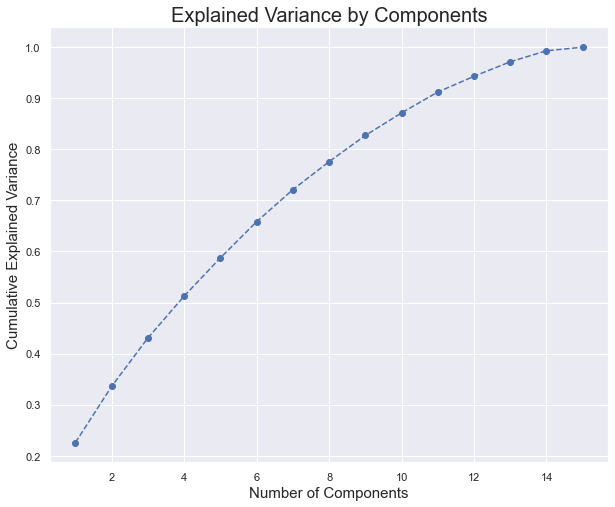

In [8]:
plt.figure(figsize=(10,8))
plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.xlabel('Number of Components', size = 15)
plt.ylabel('Cumulative Explained Variance', size = 15)
plt.title('Explained Variance by Components', size = 20)
plt.show()

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 9 components.

In [9]:
pca = PCA(n_components=9)
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)

The next step is to decide how many clustering solutions we'd test. To deal with this problem, we fit K-Means Clustering with different number of components and plot the model's inertia against the number of components on a graph. While the model's inertia is a performance metric, which is the mean squared distance between each instance and its closest centroid.

C:\Users\lyl98\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


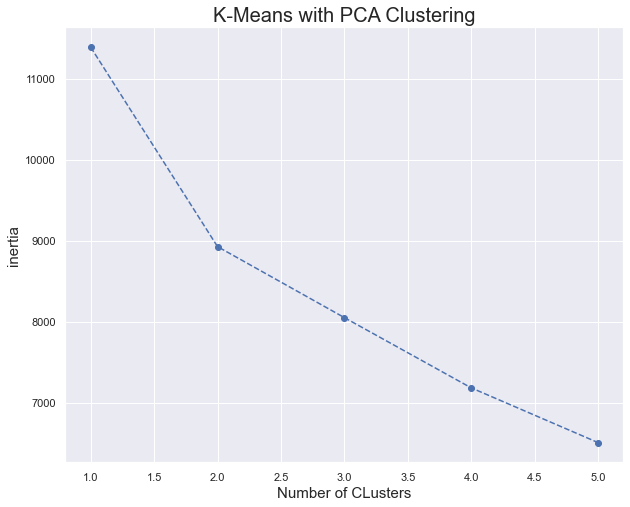

In [13]:
wcss = []
for i in range(1,6):
    kmeans_pca = KMeans(n_clusters=i, random_state=42)
    kmeans_pca.fit(pca_data)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1,6), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of CLusters', size = 15)
plt.ylabel('inertia', size = 15)
plt.title('K-Means with PCA Clustering', size = 20)
plt.show()

From this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the Inertia graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 2 clusters mark. So, we’ll be keeping a two-cluster solution.

In [14]:
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(pca_data)
y_pred = kmeans_pca.labels_

Let’s visualize the segments with respect to the first two components, then compare it with the true two-componnent PCA plot.

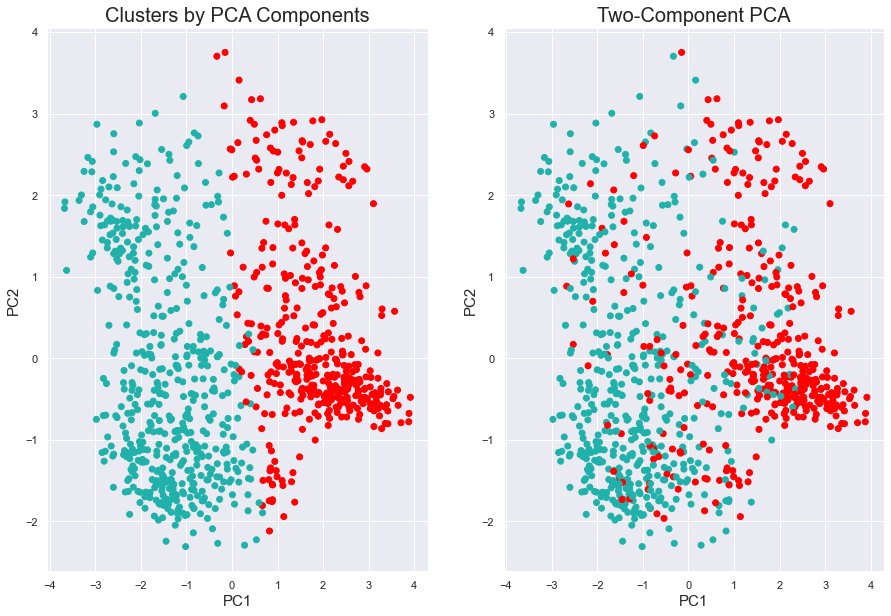

In [34]:
PC1 = pca_data[:,0]
PC2 = pca_data[:,1]

def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"

c = [colors(label) for label in y]
current_colors = [colors(label) for label in y_pred]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(PC1, PC2, c = current_colors)
ax1.set_title('Clusters by PCA Components', size = 20)
ax1.set_xlabel('PC1', size = 15)
ax1.set_ylabel('PC2', size = 15)

ax2.scatter(PC1, PC2, c = c)
ax2.set_title('Two-Component PCA', size = 20)
ax2.set_xlabel('PC1', size = 15)
ax2.set_ylabel('PC2', size = 15)
plt.show()



We can also check the accuracy for K-Means with PCA clustering.

In [15]:
sum(y == y_pred) / len(y_pred)

0.8398692810457516

The accuracy is surprisingly high! Note that for the supervised learning methods, the highest accuracy achieved is about 88%. 